In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/spherewithhole/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().spherewithhole()

X.shape =  (9931, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=5, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'hsv', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2482 points processed...
A_k, Atilde_k: 4964 points processed...
A_k, Atilde_k: 7446 points processed...
A_k, Atilde_k: 9928 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2482 points processed...
local_param: 4964 points processed...
local_param: 7446 points processed...
local_param: 9928 points processed...
local_param: all 9931 points processed...
After iter 1, max distortion is 6.940050
After iter 2, max distortion is 5.825676
After iter 3, max distortion is 5.640574
After iter 4, max distortion is 4.778531
After iter 5, max distortion is 4.623048
After iter 6, max distortion is 4.623048
After iter 7, max distortion is 4.623048
After iter 8, max distortion is 4.623048
After iter 9, max distortion is 4.623048
After iter 10, max distortion is 4.623048
After iter 11, max distortion is 4.623048
After iter 12, max dis

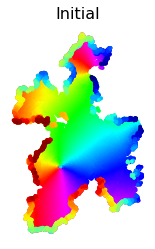

###############
Took 45.0 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0005169130427984481


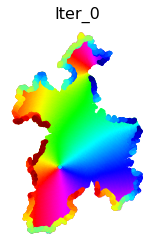

Iteration: 1
error: 0.0005454960774202573
Iteration: 2
error: 0.0005647789842941241
Iteration: 3
error: 0.000609894362433499
Iteration: 4
error: 0.0006695426872856241
Iteration: 5
error: 0.0007338738445172459


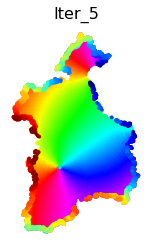

Iteration: 6
error: 0.0007845193890642664
Iteration: 7
error: 0.0008445761818016322
Iteration: 8
error: 0.0008848346248159378
Iteration: 9
error: 0.0009208015779170035
Iteration: 10
error: 0.0009661946432156841


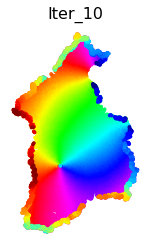

Iteration: 11
error: 0.0010156211046734218
Iteration: 12
error: 0.0010316256951053658
Iteration: 13
error: 0.0010584245449634315
Iteration: 14
error: 0.0010800653961732245
Iteration: 15
error: 0.0011018609782841833


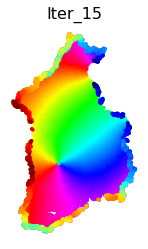

Iteration: 16
error: 0.001125367900766541
Iteration: 17
error: 0.0011514576694605606
Iteration: 18
error: 0.0011799795372593159
Iteration: 19
error: 0.001203076459074061


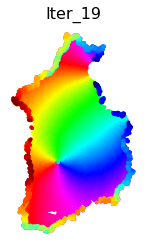

###############
Took 1137.8 seconds to refine global embedding.
###############
###############
Took 1198.6 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=5, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

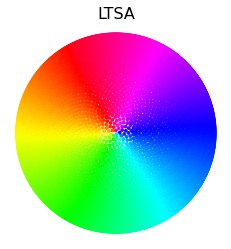

In [11]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'hsv', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

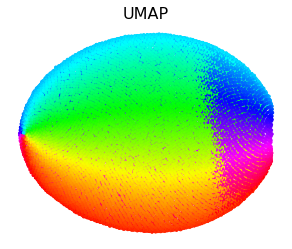

In [15]:
vis.global_embedding(y_umap, labelsMat[:,0], 'hsv', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=4, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

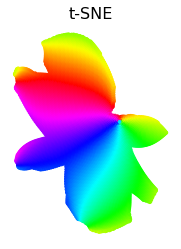

In [19]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'hsv', title='t-SNE')